In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hp-round-2/sample_submission (1).csv
/kaggle/input/hp-round-2/Phising_Testing_Dataset.csv
/kaggle/input/hp-round-2/Phising_Training Dataset.csv


#  ***Importing libaries***

In [8]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# ***Importing Datasets***

In [9]:
train = pd.read_csv(r'../input/hp-round-2/Phising_Training Dataset.csv')
test = pd.read_csv(r"../input/hp-round-2/Phising_Testing_Dataset.csv")

In [10]:
train.head()

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


# ***Data Preprocessing***

In [11]:
for i in range(train.shape[0]):
    if train['Result'][i] == -1:
        train['Result'][i] = 0
        

In [12]:
train.head()

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [13]:
test.drop("key",axis=1,inplace = True)

In [14]:
test.head()

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,1,1,1,1,-1,1,-1,1,...,1,1,1,1,1,1,1,-1,0,1
1,1,-1,1,1,1,-1,0,-1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,1,-1,1,1,1,-1,0,0,-1,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,-1,-1,-1,1,-1,-1,-1,-1,1,-1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,0,1


# ***Data Visualization***

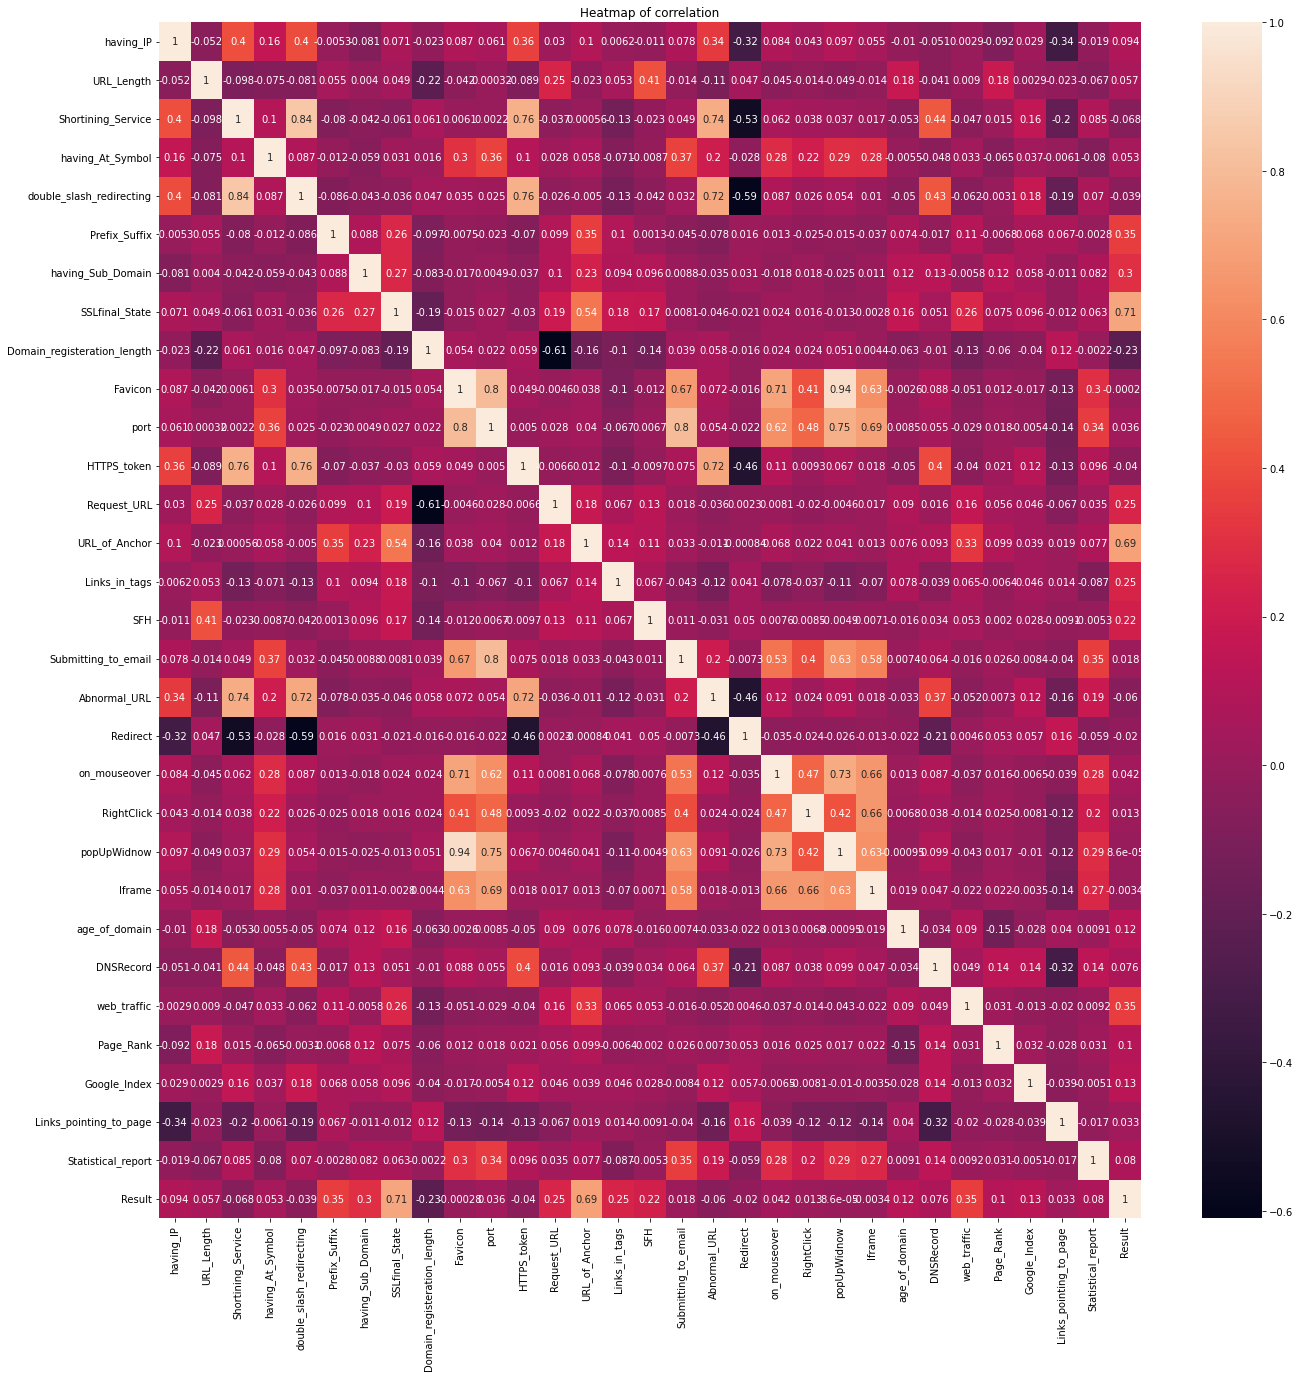

In [16]:
import matplotlib
plt.figure(figsize=(22,22))
sns.heatmap(data=train.corr(),annot=True)
plt.title('Heatmap of correlation')
plt.show()

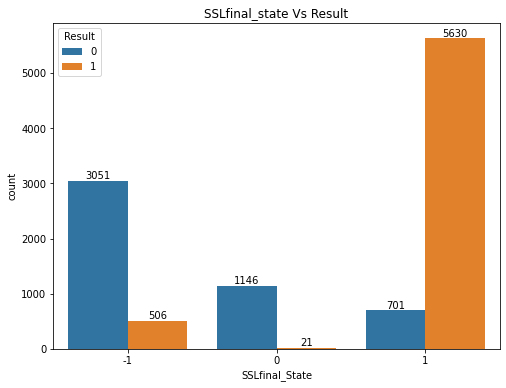

In [18]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=train,x='SSLfinal_State',hue='Result')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('SSLfinal_state Vs Result')
plt.show()

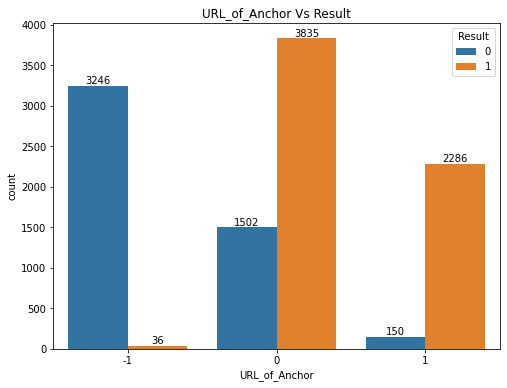

In [19]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=train,x='URL_of_Anchor',hue='Result')
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i])
plt.title('URL_of_Anchor Vs Result')
plt.show()

## ***Define Target Variable (y) and Feature Variables (X)***

In [20]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

# ***Train Test Split***

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=2084)

# ***Modelling***

## **Decision Tree Classifier**

In [24]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
y_pred_dtc = clf.predict(X_test)
print(f'Classification Report of Decision Tree Classifier: \n\n{classification_report(y_test,y_pred_dtc)}')
accuracy = accuracy_score(y_test,y_pred_dtc)
print("Accuracy of the DTC:",accuracy)

Classification Report of Decision Tree Classifier: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211

Accuracy of the DTC: 0.9905020352781547


## **Random Forest Classifier**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 200)
rfc.fit(X,y)
y_pred_rfc = rfc.predict(X_test)
print(f'Classification Report of RFC Classifier: \n\n{classification_report(y_test,y_pred_rfc)}')
accuracy = accuracy_score(y_test,y_pred_rfc)
print("Accuracy of the RFC:",accuracy)

Classification Report of RFC Classifier: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211

Accuracy of the RFC: 0.9923111714156491


## **XGBoost Classifier**

In [32]:
from xgboost import XGBClassifier

from warnings import simplefilter

simplefilter("ignore")
# XGB amaxClassifier Model
xgbc = XGBClassifier(n_estimators= 300,random_state=1)
# Fitting the model
xgbc.fit(X,y,eval_metric=f1_eval)
#predictions on test data
y_pred = xgbc.predict(X_test)
print(f'Classification Report of XGB Classifier: \n\n{classification_report(y_test,y_pred)}')
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of the XGB:",accuracy)


Classification Report of XGB Classifier: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211

Accuracy of the XGB: 0.9914066033469019


## **LGBM Classifier**

In [48]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X,y)
y_pred_lgbm = lgbm.predict(X_test)
print(f'Classification Report of LGBM Classifier: \n\n{classification_report(y_test,y_pred)}')
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of the LGBM:",accuracy)

Classification Report of LGBM Classifier: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211

Accuracy of the LGBM: 0.9914066033469019


## **Stacking Classifier**

In [55]:
from mlxtend.classifier import StackingClassifier
clf_stack = StackingClassifier(classifiers =[lgbm, clf,xgbc,rfc], meta_classifier = rfc,
                               use_probas = True, use_features_in_secondary = True)
model_stack = clf_stack.fit(X, y)   # training of stacked model
pred_stack = model_stack.predict(X_test)
acc_stack = accuracy_score(y_test, pred_stack)

clf_report = classification_report(y_test, pred_stack)

print(f"F1 Score of Stacking Classifier is : {acc_stack}")

print(f"Classification Report : \n{clf_report}")

F1 Score of Ada Boost Classifier is : 0.9918588873812755
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211



## **Voting Classifier**

In [57]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('RFC', rfc), ('LGBC', lgbm), ('XGB', xgbc), ('DTC',clf)], voting='soft')
eclf1.fit(X, y)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))
f1_gb = accuracy_score(y_test, predictions)
print(f"F1 Score of Voting Classifier is : {f1_gb}")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1231

    accuracy                           0.99      2211
   macro avg       0.99      0.99      0.99      2211
weighted avg       0.99      0.99      0.99      2211

F1 Score of Voting Classifier is : 0.9909543193125283


In [58]:
ss = pd.read_csv(r'../input/hp-round-2/sample_submission (1).csv')

In [59]:
ss.head()

,key,Result
0,21338,-1
1,21339,1
2,21340,1
3,21341,1
4,21342,-1


In [70]:
preds = clf_stack.predict(test)
preds

array([1, 0, 0, ..., 0, 1, 1])

In [71]:
for i in range(len(preds)):
    if preds[i] == 0:
        preds[i] = -1

In [62]:
preds

array([ 1, -1, -1, ..., -1,  1,  1])

In [66]:
test2 = pd.read_csv(r"../input/hp-round-2/Phising_Testing_Dataset.csv")
test2.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1
3,21341,-1,-1,-1,1,-1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,1,-1
4,21342,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,0,1


In [72]:
ss['key'] = test2['key']
ss['Result'] = preds

In [68]:
ss

,key,Result
0,21338,1
1,21339,-1
2,21340,-1
3,21341,-1
4,21342,1
...,...,...
2095,23433,1
2096,23434,1
2097,23435,-1
2098,23436,1


In [73]:
ss.to_csv('stack_submission.csv',index=False)